In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [5]:
import pickle

with open('sig1.pickle', 'rb') as f:
    sig1 = pickle.load(f)
    
with open('sig2.pickle', 'rb') as f:
    sig2 = pickle.load(f)
    

In [14]:
angles = np.array([-75, -70, -65, -60, -55, -50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])
    
offsets = np.array([
    [-164, -82, 82, 164],
    [-160, -80, 80, 160],
    [-154, -77, 77, 154],
    [-146, -73, 73, 146],
    [-138, -69, 69, 138],
    [-130, -65, 65, 130],
    [-120, -60, 60, 120],
    [-108, -54, 54, 108],
    [-98, -49, 49, 98],
    [-84, -42, 42, 84],
    [-72, -36, 36, 72],
    [-58, -29, 29, 58],
    [-44, -22, 22, 44],
    [-30, -15, 15, 30],
    [-14, -7, 7, 14],
    [0, 0, 0, 0],
    [14, 7, -7, -14],
    [30, 15, -15, -30],
    [44, 22, -22, -44],
    [58, 29, -29, -58],
    [72, 36, -36, -72],
    [84, 42, -42, -84],
    [98, 49, -49, -98],
    [108, 54, -54, -108],
    [120, 60, -60, -120],
    [130, 65, -65, -130],
    [138, 69, -69, -138],
    [146, 73, -73, -146],
    [154, 77, -77, -154],
    [160, 80, -80, -160],
    [164, 82, -82, -164]
])


def shift5(arr, num, cval=np.nan):
    result = np.empty_like(arr)
    if num > 0:
        result[:num] = 0
        result[num:] = arr[:-num]
    elif num < 0:
        result[num:] = 0
        result[:num] = arr[-num:]
    else:
        result = arr
    return result

def reduce_signals(signals, step):
    m,n = signals.shape
    res = np.zeros((m,int(n/step)))
    for i in np.arange(0,m):
        res[i] = signals[i][0::4]
    return res

def calculate_signals(offsets, sig, channels):
    shifted  = np.zeros((sig.shape[1],sig.shape[0]))
    result   = np.zeros((offsets.shape[0],sig.shape[0]))
    for i in np.arange(len(offsets)):
        for j in np.arange(len(channels)):
            shifted[j] = shift5(channels[j],offsets[i][j])
        result[i] = np.sum(shifted, axis=0)
    return reduce_signals(result, 4)

def calculate_rms(data):
    return np.array([np.sqrt(np.mean(direction**2)) for direction in data])

In [15]:
channels1 = sig1.T
channels2 = sig2.T

result1 = calculate_signals(offsets, sig1, channels1)
result2 = calculate_signals(offsets, sig2, channels2)

rms1 = calculate_rms(result1)

posxmax1 = rms1.argmax()
ymax1 = rms1[posxmax1]
xmax1 = angles[posxmax1]

rms2 = calculate_rms(result2)

posxmax2 = rms2.argmax()
ymax2 = rms2[posxmax2]
xmax2 = angles[posxmax2]

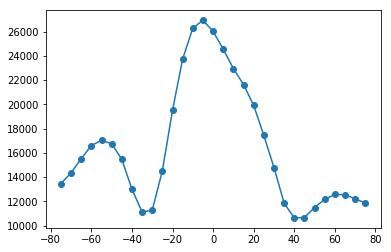

In [16]:
plt.plot(angles, rms1, marker='o')

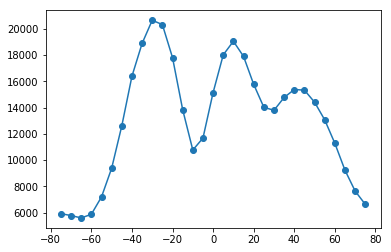

In [17]:
plt.plot(angles, rms2, marker='o')

In [18]:
def powers(x,y,ki):
    E = 0
    for k in np.arange(*ki):
        S = np.dot(x,shift5(y,k,cval=0))
        if (S>E):
            E=S
    return np.dot(x,y)

In [19]:
def powersAll(sig1,sig2):
    KM = np.array([[[-3,3+1]]*31]*31)
    RM = np.zeros((31,31))
    for i in np.arange(KM.shape[0]):
        for j in np.arange(KM.shape[1]):
            RM[i][j] = powers(result1[i],result2[j],KM[i][j])
    return RM

In [20]:
%timeit powersAll(result1,result2)

1.7 s ± 69.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
nx, ny = (31, 31)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
z = powersAll(result1,result2)

<IPython.core.display.Javascript object>


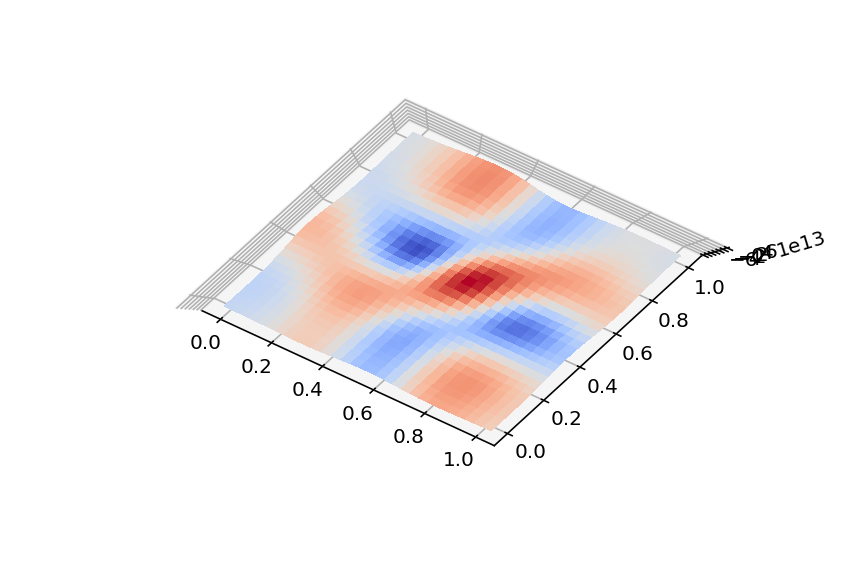

In [28]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xv,yv,z,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


In [23]:
def allC():
    result1 = calculate_signals(offsets, sig1, channels1)
    result2 = calculate_signals(offsets, sig2, channels2)
    z = powersAll(result1,result2)


In [24]:
%timeit allC()

3 s ± 227 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
